## First, install the package

Run ```pip install -e .``` at the proj root directory

## Pretrain the model on serveral datasets under inductive setting. 
```
bash scripts/run_small_dataset.sh $GPU_NUMBER
```

GPU_NUMBER is the index of GPU to use. For example, ```bash scripts/run_small_dataset.sh 3``` means using GPU 3 to train the models.


## Perform the edit on pretrained model.

```
bash scripts/eval.sh $GPU_NUMBER
```

## Load saved results for visualization

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

datasets = ['cora', 'flickr', 'amazoncomputers', 
            'amazonphoto', 'coauthorcs']

# datasets = ['cora', 'flickr', 'reddit2', 'arxiv']
# models = ['GCN', 'SAGE']
models = ['SIGN', 'SGC', 'SIGN_MLP', 'SGC_MLP']
criterion = 'wrong2correct'
# ROOT = '/home/zl105/edit_gnn/finetune_new/enn_ft'
ROOT = '/home/zl105/edit_gnn/rebuttal/finetune_new_std'

summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        file_name = f'{ROOT}/{dataset}/GD/{model}_{criterion}_eval.json'
        with open(file_name, 'r') as f:
            summary[dataset][model] = json.load(f)
# print(summary)

In [8]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit' # seq_edit, ind_edit, batch_edit
metric = 'success_rate' ### val_drawdown, test_drawdown

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)

for idx, model in enumerate(models):
    for idx_j, dataset in enumerate(datasets):
        print(model, dataset, 'bef_edit_tst_acc', summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100)
        print(model, dataset, f'{metric}: %.2f' % (gathered_data[idx][idx_j]))
        print(model, dataset, '%.1f' % (summary[dataset][model][edit_way]['test_std'] * 100))

SIGN cora bef_edit_tst_acc 87.2
SIGN cora success_rate: 1.00
SIGN cora 3.8
SIGN flickr bef_edit_tst_acc 51.418455608837895
SIGN flickr success_rate: 1.00
SIGN flickr 9.6
SIGN amazoncomputers bef_edit_tst_acc 85.59670781893004
SIGN amazoncomputers success_rate: 1.00
SIGN amazoncomputers 15.0
SIGN amazonphoto bef_edit_tst_acc 93.6435124508519
SIGN amazonphoto success_rate: 1.00
SIGN amazonphoto 16.7
SIGN coauthorcs bef_edit_tst_acc 95.39903137502633
SIGN coauthorcs success_rate: 1.00
SIGN coauthorcs 1.3
SGC cora bef_edit_tst_acc 87.6
SGC cora success_rate: 1.00
SGC cora 4.5
SGC flickr bef_edit_tst_acc 46.744050553489
SGC flickr success_rate: 1.00
SGC flickr 13.0
SGC amazoncomputers bef_edit_tst_acc 87.14303529118344
SGC amazoncomputers success_rate: 1.00
SGC amazoncomputers 24.3
SGC amazonphoto bef_edit_tst_acc 93.2175622542595
SGC amazonphoto success_rate: 1.00
SGC amazonphoto 15.5
SGC coauthorcs bef_edit_tst_acc 94.8831332912192
SGC coauthorcs success_rate: 1.00
SGC coauthorcs 2.5
SIGN

<Figure size 640x320 with 0 Axes>

In [9]:
edit_way = 'ind_edit' # seq_edit, ind_edit, batch_edit
metric = 'test_drawdown' ### val_drawdown, test_drawdown

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)

for idx, model in enumerate(models):
    for idx_j, dataset in enumerate(datasets):
        print(model, dataset, 'bef_edit_tst_acc %.2f' % (summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100))
        print(model, dataset, 'after edit tst acc: %.2f' % (summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100 - gathered_data[idx][idx_j]) + '±%.2f' % (summary[dataset][model][edit_way]['test_std'] * 100))
        print(model, dataset, f'{metric}: %.2f' % (gathered_data[idx][idx_j]))

SIGN cora bef_edit_tst_acc 87.20
SIGN cora after edit tst acc: 82.40±3.79
SIGN cora test_drawdown: 4.80
SIGN flickr bef_edit_tst_acc 51.42
SIGN flickr after edit tst acc: 36.44±9.60
SIGN flickr test_drawdown: 14.98
SIGN amazoncomputers bef_edit_tst_acc 85.60
SIGN amazoncomputers after edit tst acc: 58.33±15.05
SIGN amazoncomputers test_drawdown: 27.27
SIGN amazonphoto bef_edit_tst_acc 93.64
SIGN amazonphoto after edit tst acc: 66.11±16.71
SIGN amazonphoto test_drawdown: 27.53
SIGN coauthorcs bef_edit_tst_acc 95.40
SIGN coauthorcs after edit tst acc: 93.98±1.26
SIGN coauthorcs test_drawdown: 1.42
SGC cora bef_edit_tst_acc 87.60
SGC cora after edit tst acc: 83.87±4.50
SGC cora test_drawdown: 3.73
SGC flickr bef_edit_tst_acc 46.74
SGC flickr after edit tst acc: 16.84±12.98
SGC flickr test_drawdown: 29.91
SGC amazoncomputers bef_edit_tst_acc 87.14
SGC amazoncomputers after edit tst acc: 26.17±24.29
SGC amazoncomputers test_drawdown: 60.97
SGC amazonphoto bef_edit_tst_acc 93.22
SGC amazonph

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


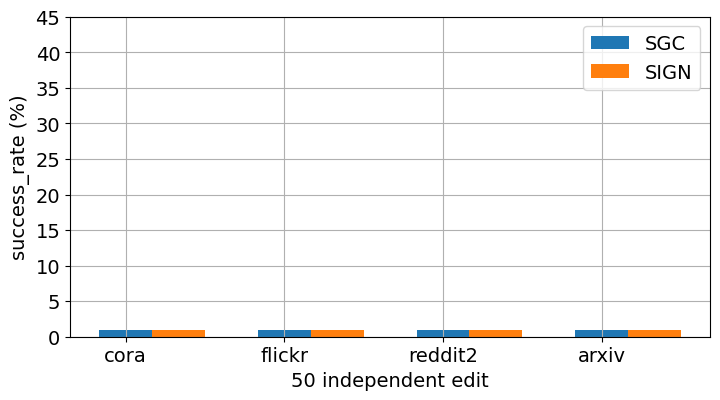

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step_size = 1. / (len(models)+1) 
X = np.arange(num_datasets)

title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
for i in range(len(models)):
    ax.bar(X + step_size * i, gathered_data[i], width = step_size)

ax.set_xticks(X + np.floor((len(models)-1)/2)* step_size)
ax.set_xticklabels(datasets)
ax.set_yticks(np.arange(0., 50., 5.))
ax.set_ylabel(f'{metric} (%)')
ax.set_xlabel(f'{title_mapping[edit_way]}')
ax.grid()
ax.legend(models)


In [4]:
len(gathered_data)

5